# Análise de inadimplência

Neste projeto, utilizamos técnicas de análise de dados para identificar os fatores que mais contribuem para a inadimplência em uma instituição financeira

# Extração dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/kaggle/input/financeiro/Inadimplncia_financeiro.csv", na_values="na")

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Na tabela a cima podemos ver que existem alguns atributos em branco que estao sendo sinalizados como NaN. vamos lidar com eles na parte de estrutura e filtragem e limpeza dos dados.

# Estruturando dos dados

In [4]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [5]:
df.drop("id",axis=1)

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [6]:
df.shape

(10127, 16)

In [7]:
df[df["default"]==0].shape

(8500, 16)

In [8]:
df[df["default"]==1].shape

(1627, 16)

In [9]:
total,_ = df.shape
inadimplentes,_ = df[df["default"]==1].shape
adimplentes,_ = df[df["default"]==0].shape

In [10]:
print(f"Temos um total de {round(100 * adimplentes / total,2)}% dos nossos clientes como adimplentes")
print(f"Temos um total de {round(100 * inadimplentes / total,2)}% dos nossos clientes como inadimplentes")

Temos um total de 83.93% dos nossos clientes como adimplentes
Temos um total de 16.07% dos nossos clientes como inadimplentes



Dados faltantes


In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

como podemos ver os atributos com NaN sao escolaridade, estado civil e salario anual, vamos ver se eles podem ser descartados.

In [12]:
def dados_faltantes(df:pd.DataFrame) -> None:
    dados_faltantes=[]
    for col in df.columns:
        if df[col].isna().any():
            qtd ,_ =df[df[col].isna()].shape
            total ,_ = df.shape
            dict_dados_faltantes ={col: {"quantidade":qtd, "porcentagem": round(100* qtd/total,2)}}
            dados_faltantes.append(dict_dados_faltantes)
    for stat in dados_faltantes:
        print(stat)

In [13]:
dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
dados_faltantes(df=df[df["default"] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
dados_faltantes(df=df[df["default"] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Como a porcentagem de dados faltando para os clientes adimplentes e inadimplentes é muito próxima, podemos eliminá-los da tabela, pois a diferença gerada por isso será igual para os dois.

# Transformando e limpando os dados

transformando strings em numeros

In [16]:
df[["limite_credito","valor_transacoes_12m"]].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [17]:
df[["limite_credito","valor_transacoes_12m"]].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [18]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [19]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [20]:
df[["limite_credito","valor_transacoes_12m"]].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [21]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


eliminando dados em branco

como os dados em falta foram definidos anteriormente, podem ser removidos agora com facilidade

In [22]:
df.dropna(inplace=True)

E para que possamos ver a diferença, a seguir vamos fazer a seguinte comparação.

In [23]:
df.shape

(7081, 16)

In [24]:
df[df['default'] == 0].shape

(5968, 16)

In [25]:
df[df['default'] == 1].shape

(1113, 16)

In [26]:
total_novo, _ = df.shape
adimplentes_novo, _ = df[df['default'] == 0].shape
inadimplentes_novo, _ = df[df['default'] == 1].shape

In [27]:
print(f"A proporcão adimplentes ativos é de {round(100 * adimplentes / total,2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * adimplentes_novo / total_novo,2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * inadimplentes / total,2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * inadimplentes_novo / total_novo,2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# Visualização 

Nessa seção, veremos a relação entre a inadimplência e adimplencia dos clientes e seus atributos.

In [28]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

In [29]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


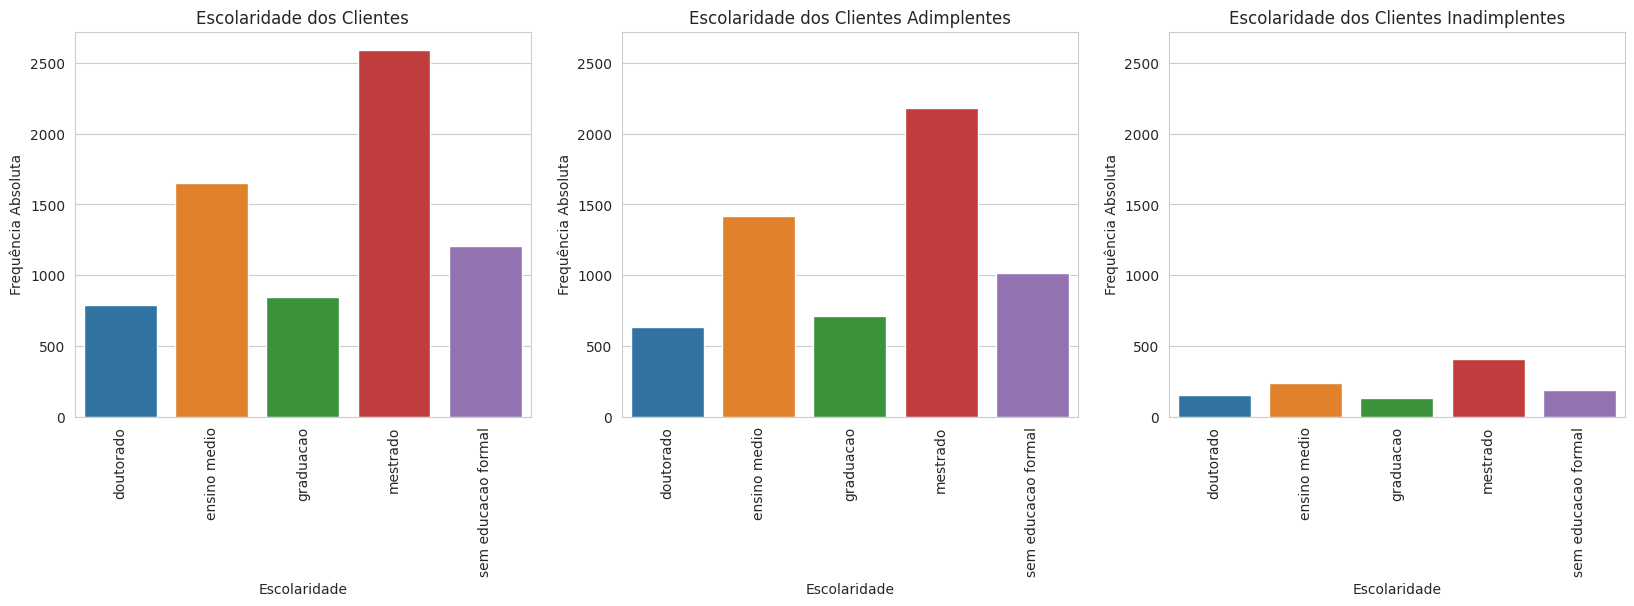

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Apesar da pequena diferença entre os níveis de escolaridade, o gráfico mostra que os clientes que estão cursando mestrado são mais propensos à inadimplência.

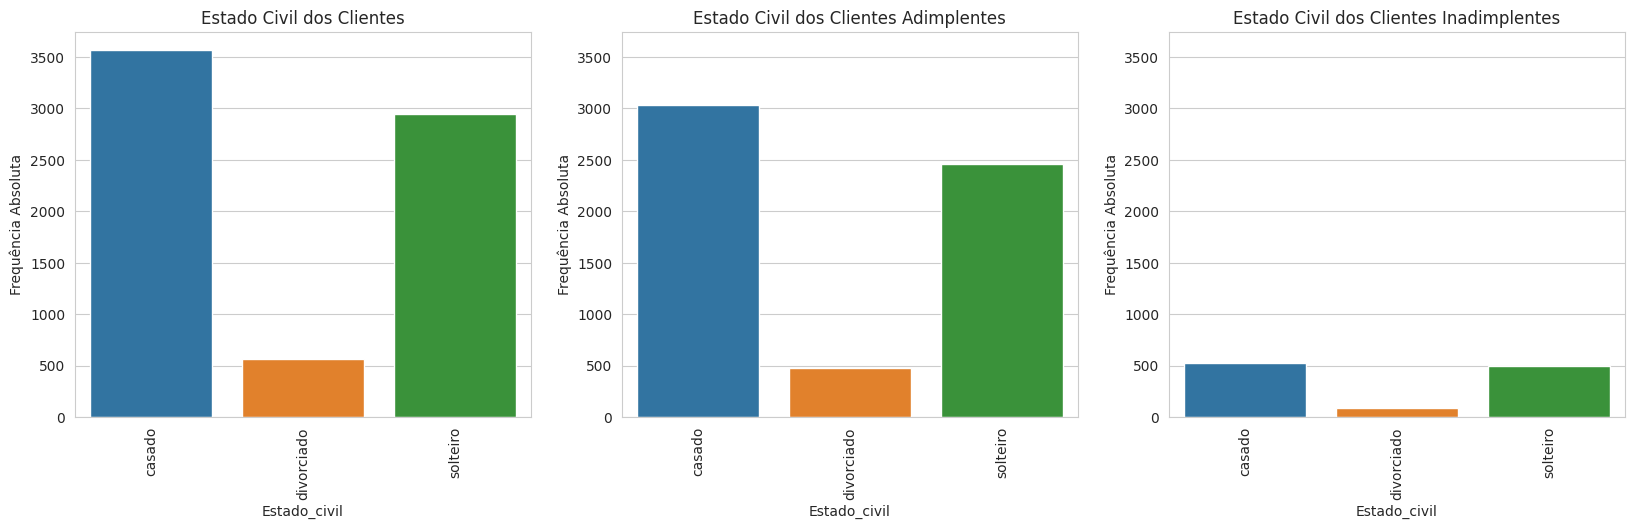

In [31]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

No gráfico acima, mostrando o estado civil dos clientes, podemos ver que os casados e solteiros são responsáveis por mais de 80% dos inadimplentes.

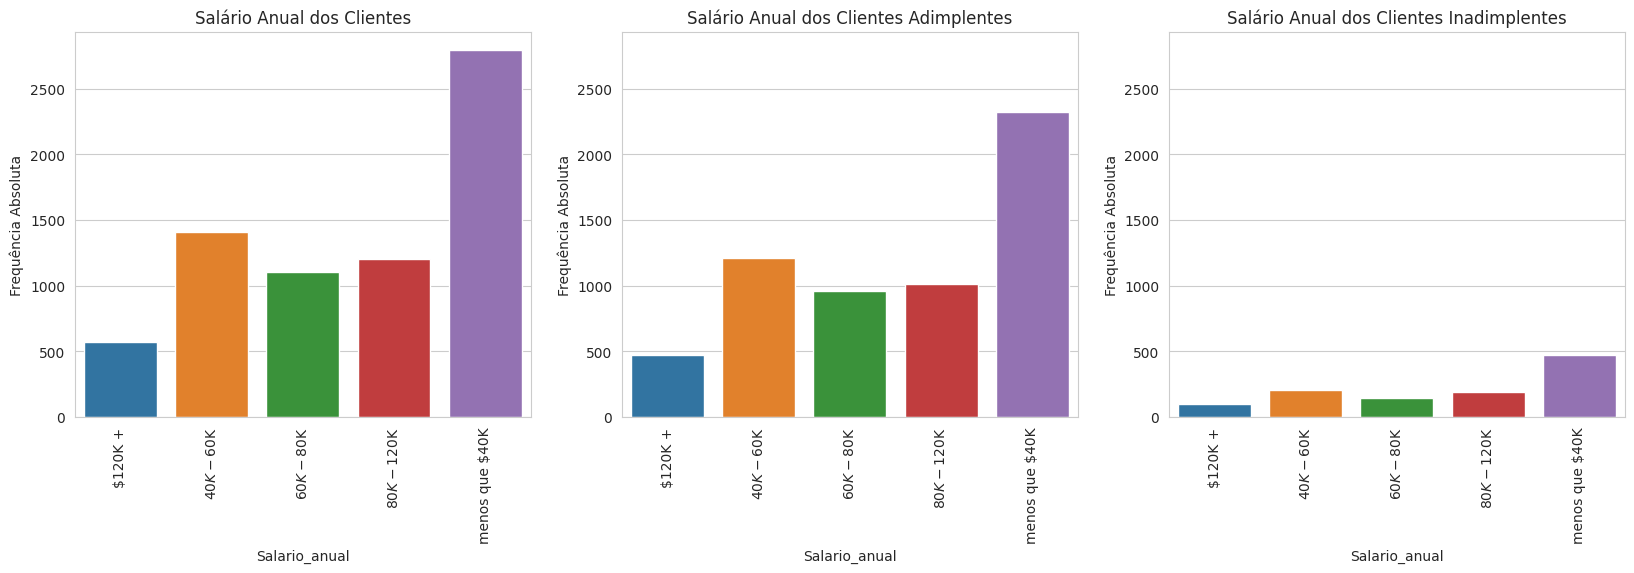

In [32]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Neste gráfico, é possível observar que uma quantidade expressiva de clientes inadimplentes possui salários anuais abaixo de 40 mil reais.

In [33]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


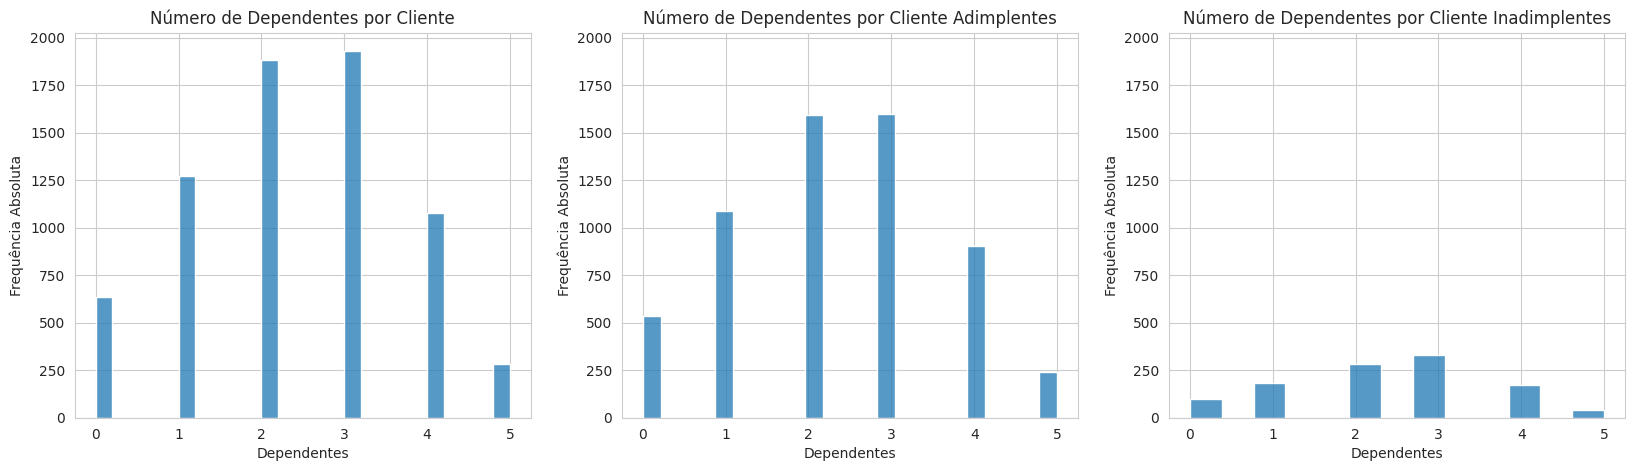

In [34]:
coluna = 'dependentes'
titulos = ['Número de Dependentes por Cliente', 'Número de Dependentes por Cliente Adimplentes', 'Número de Dependentes por Cliente Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui é possível notar que os clientes com 2 ou 3 dependentes têm maior tendência à inadimplência.

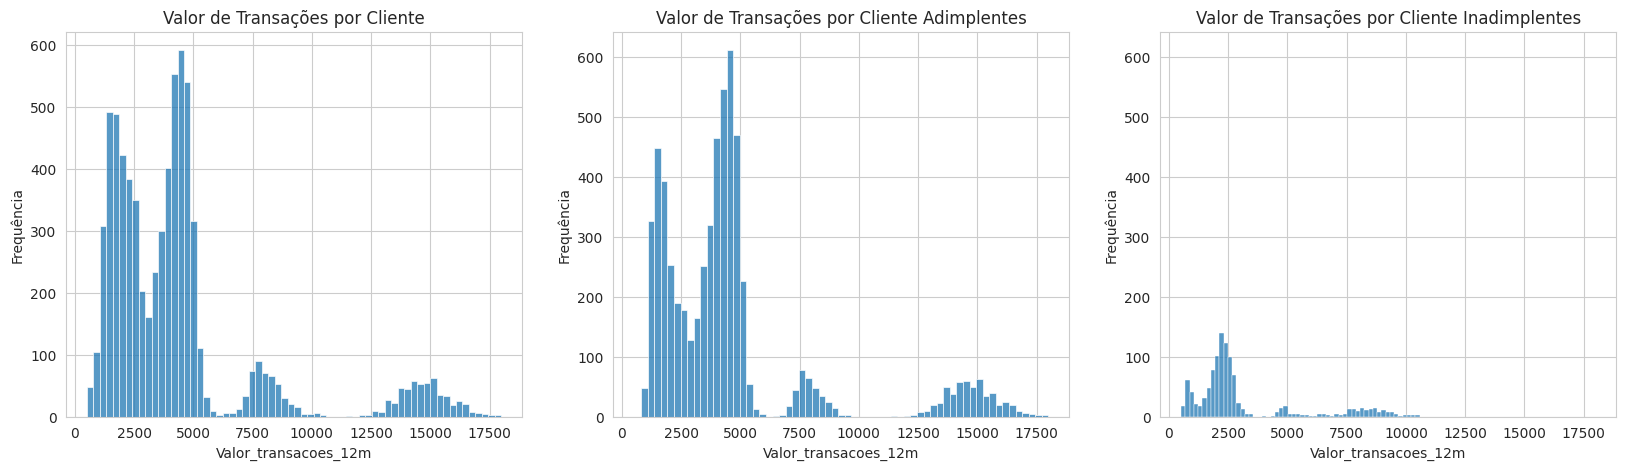

In [35]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações por Cliente', 'Valor de Transações por Cliente Adimplentes', 'Valor de Transações por Cliente Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

O gráfico acima mostra que os clientes com transações anuais de 2 mil a 3 mil reais são os mais propensos a atrasar seus pagamentos.

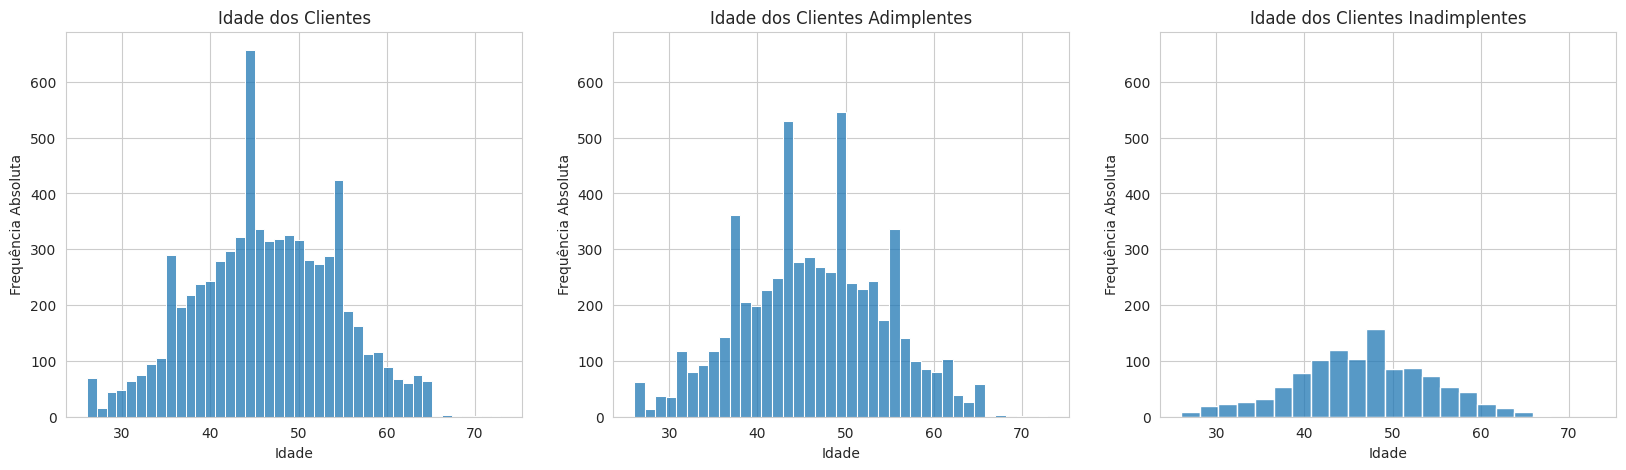

In [36]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

O gráfico sugere que os clientes que estao entre seus 40 a 45 anos são mais propensos a atrasar o pagamento de suas contas

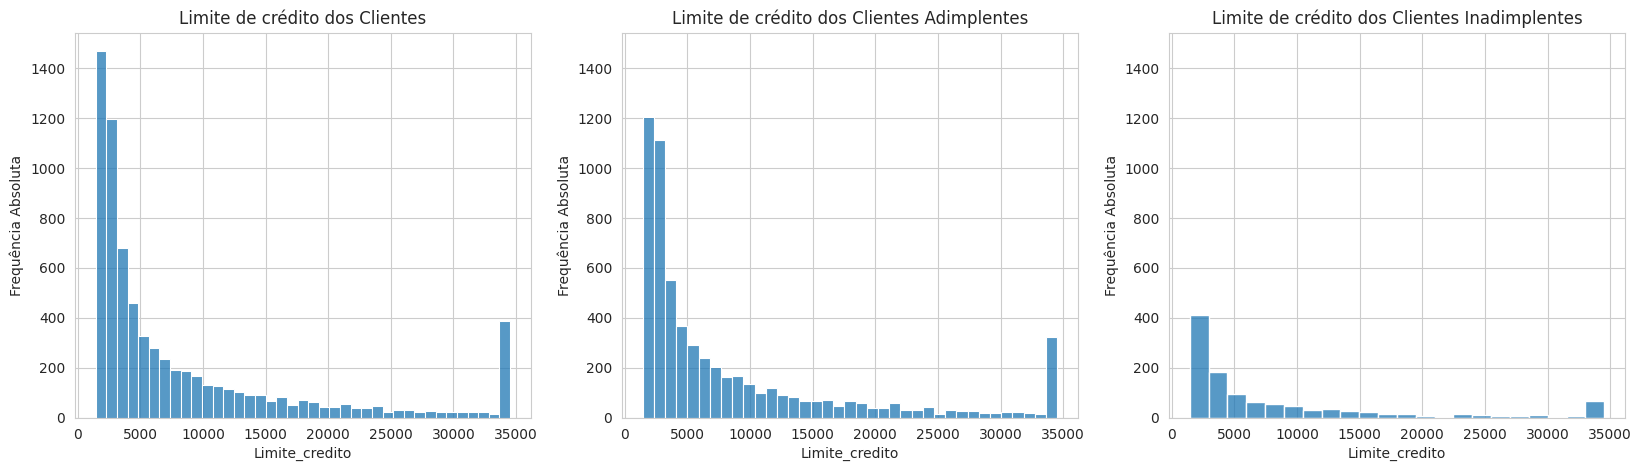

In [37]:
coluna = 'limite_credito'
titulos = ['Limite de crédito dos Clientes', 'Limite de crédito dos Clientes Adimplentes', 'Limite de crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

O gráfico mostra que clientes com limite de crédito baixo são mais propensos a se tornarem inadimplentes.

# Resumo

Nesse projeto, realizamos uma análise de inadimplência em uma instituição financeira. Utilizamos um conjunto com mais de 10.000 dados de clientes para identificar os fatores que mais contribuem para a inadimplência. Os resultados da análise mostram que os principais fatores de risco de inadimplência são:

1. Estado civil dos clientes
2. Salário anual
3. Número de dependentes
4. Idade  
5. Limite de crédito

Com isso, podemos determinar quais grupos têm uma maior tendência a se tornar inadimplente por um ou mais fatores.